# Multivariate Analysis with Seaborn

Multivariate visualizations are an expansion of bivariate analysis, where we add another variable (or variables). Often, adding the third variable helps us to find some important pattern or information that we couldn´t have observed before. 

In [94]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [95]:
# Load the data
penguins = sns.load_dataset('penguins')
penguins.dropna(inplace = True)

In [96]:
# Take a look at first 5 rows
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


# Mapping the third variable to encoding

There are 3 ways how to map the third variable to create a visual semantic:

- **encoding with color**
- **encoding with the size**
- **encoding with the shape**

Again, choosing appropriate encoding depends on the question we ask, input data or purpose of visualizations. Let´s look at some examples.

# 1. Visualizing the distribution

## 1.1 Boxplot

As we mentioned in the Bivariate analysis notebook, boxplots are great when becomes to comparing several groups. Let´s say we want to see the distribution of penguins body mass based on the island. We are also interested whether there are some differences in the ranges of the values between females and males. As before, we plot the first categorical variable 'island', then numerical variable 'body_mass_g' and pass the third groupiny variable 'sex' to `hue` parameter.

Here, the third variable is mapped with **color encoding** that produces different colors and visually help determines levels of a subset.

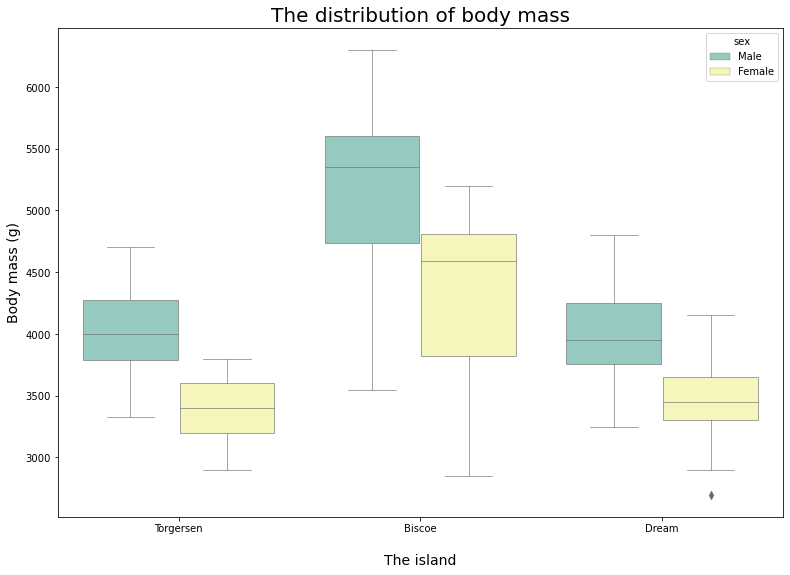

In [117]:
# Boxplots of body mass based on the island and the gender
plt.subplots(figsize = (13,9))
sns.boxplot(data = penguins, 
            x = 'island', 
            y = 'body_mass_g', 
            hue = 'sex', 
            palette = 'Set3',
            linewidth = 0.6)
plt.xlabel('The island', fontsize = 14, labelpad = 20)     # Setting the title, fontsize and adjusting the spacing
plt.ylabel('Body mass (g)', fontsize = 14)
plt.title('The distribution of body mass', fontsize = 20);

## 1.2 Stripplots

A stripplot is another kind of categorical scatterplot that can be useful when comparing different groups. Again, the categories of the third variable are distinguished using **different colors**.

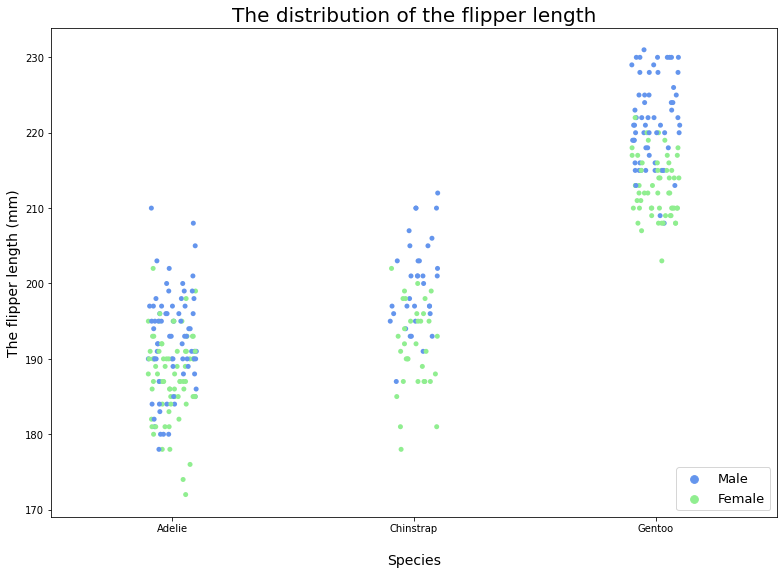

In [125]:
# Stripplots
plt.subplots(figsize = (13,9))
sns.stripplot(data = penguins, 
              x = 'species', 
              y = 'flipper_length_mm', 
              hue ='sex')
plt.xlabel('Species', fontsize = 14, labelpad = 20)     
plt.ylabel('The flipper length (mm)', fontsize = 14)
plt.title('The distribution of the flipper length', 
          fontsize = 20)
plt.legend(loc = 4, prop = {'size': 13});           # Adjusting the legend´s position and the size

In the above plot we can observe the flipper length distribution based on species and the gender of penguins. We can immediately see some differences and similarities between species thanks to adding a third variable.

---
## 1.3 Relplot

When we want to see a possible relationship between variables we can choose between three encoding approaches and decide which kind is the most suitable. In the below example we can see how body mass and the flipper length relate based on penguins´s species.

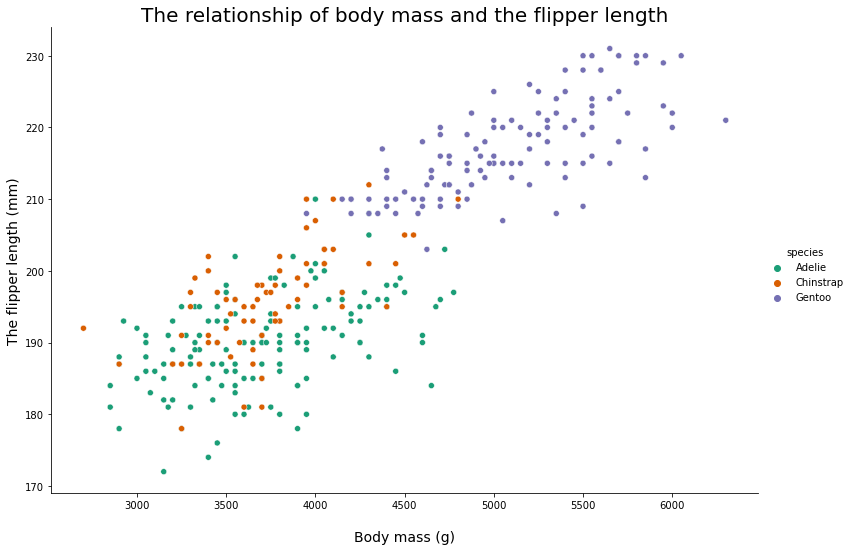

In [130]:
# A scatterplot of body mass and the flipper length based on species
sns.relplot(data = penguins, 
            x = 'body_mass_g', 
            y = 'flipper_length_mm', 
            hue = 'species',
            palette = 'Dark2',
            height = 7,
            aspect = 1.5,)
plt.xlabel('Body mass (g)', fontsize = 14, labelpad = 20)     
plt.ylabel('The flipper length (mm)', fontsize = 14)
plt.title('The relationship of body mass and the flipper length', fontsize = 20);

## 1.4 Scatterplot

In some cases, encoding with the third variable with **the size** can emphasize important aspects we found during exploratory data analysis. The graph below shows that the Gentoo species' penguin has the highest body mass and the longest flippers. 

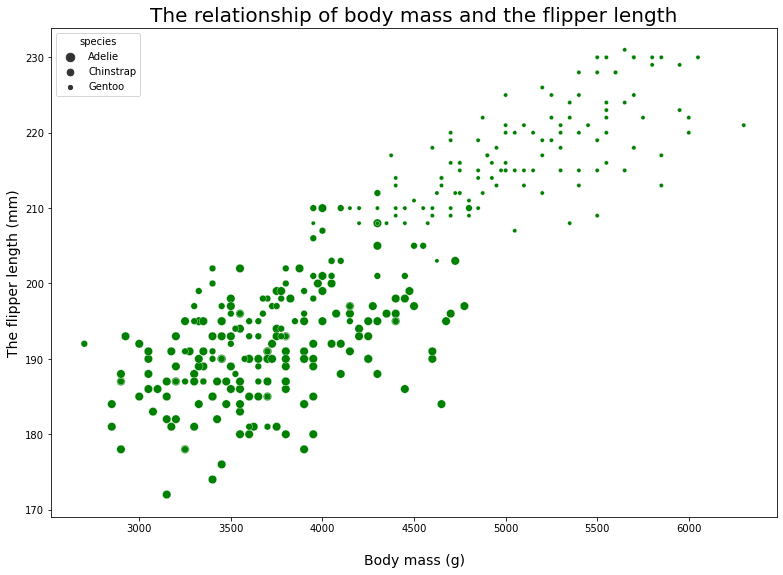

In [131]:
# A scatterplot 
fig, ax = plt.subplots(figsize = (13,9))
sns.scatterplot(data = penguins, 
                x = 'body_mass_g', 
                y = 'flipper_length_mm', 
                size = 'species',
                color = 'green')
plt.xlabel('Body mass (g)', fontsize = 14, labelpad = 20)     
plt.ylabel('The flipper length (mm)', fontsize = 14)
plt.title('The relationship of body mass and the flipper length', fontsize = 20);

## 1.5 Lmplot

Sometimes, we want to emphasize different categories of subset more sophisticatedly. In that case, we can choose specific  **markers** for each category. 

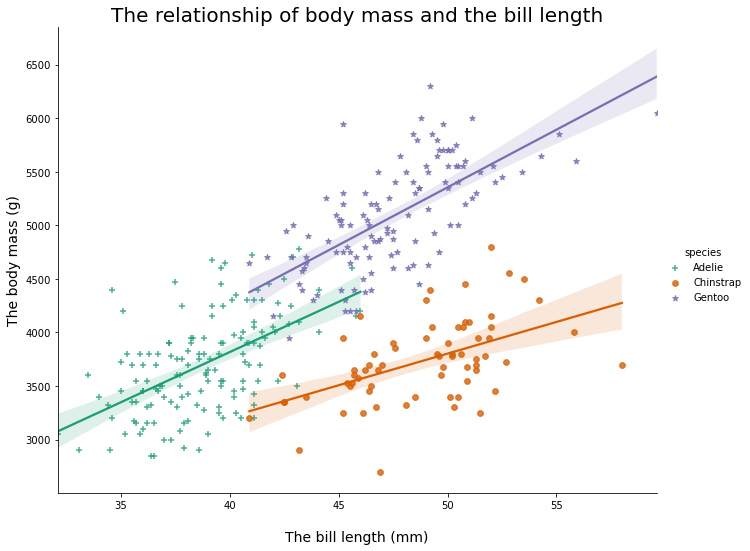

In [132]:
# A lmplot
sns.lmplot(data = penguins, 
           x = 'bill_length_mm', 
           y = 'body_mass_g', 
           hue = 'species', 
           markers = ['+','8','*'],
           palette = 'Dark2',
           height = 7,
           aspect = 1.3)
plt.xlabel('The bill length (mm)', fontsize = 14, labelpad = 20)     
plt.ylabel('The body mass (g)', fontsize = 14)
plt.title('The relationship of body mass and the bill length', fontsize = 20);

# 2.  FacetGrid

Sometimes we want to display a relationship or a distribution not in a single Axes, but create a separate subplots. This can be done using a FacetGrid object, where we specify 3 dimensions:
- row 
- col
- hue - plotting different subset

Let´s say we want to look at the distribution of penguins species, so we assign 'species' to `col` parameter.

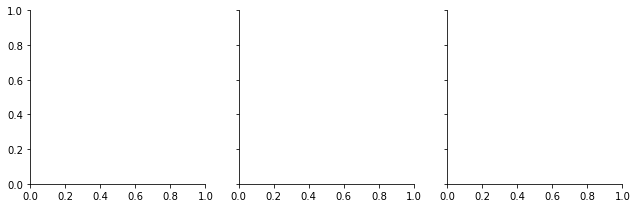

In [102]:
# Initializing a FacetGrid object
g = sns.FacetGrid(penguins, col = 'species')

When we initialized FacetGrid object, a Figure and Axes will be returned. To create some plot we apply `.map()` on a FacetGrid, where we specify plotting function and variables we want to plot.

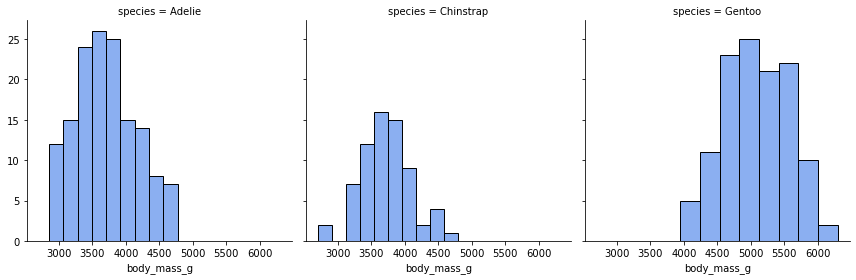

In [133]:
# Initializing a FacetGrid object and col parameter
g = sns.FacetGrid(penguins, 
                  col = 'species',
                  height = 4,
                  aspect = 1)
# Mapping plotting function and defining a variable
g.map(sns.histplot, 'body_mass_g');

Let´s add the third variable using `row` parameter. We want to see the distribution of body mass also based on species gender. 

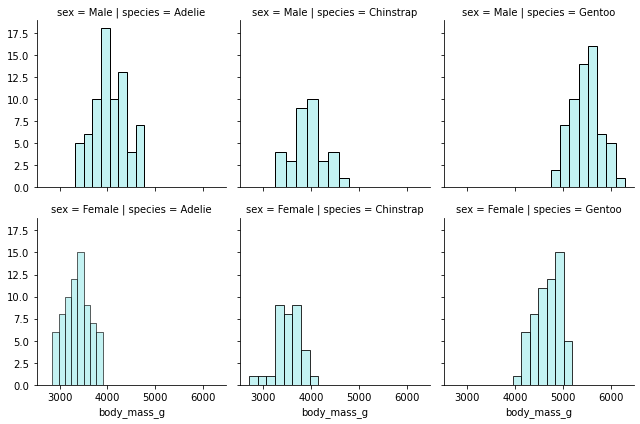

In [104]:
# Initializing a FacetGrid object and col and row parameters
g = sns.FacetGrid(penguins, 
                  col = 'species', 
                  row = 'sex')
# Mapping plotting function and defining variable
g.map(sns.histplot, 'body_mass_g', color = 'paleturquoise');

To visualize a relationship between 2 numerical variables we just add particular variable names. Let´s visualize a relationship between body mass and the flipper lenght based on species. We also add 'sex' variable encoded using color.

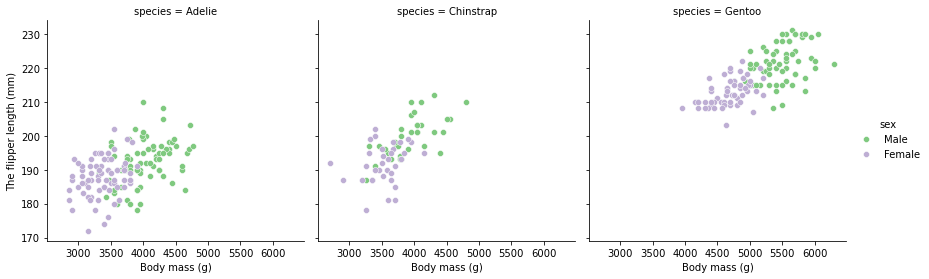

In [105]:
# Initializing a FacetGrid object and col parameter
g = sns.FacetGrid(data = penguins, 
                  col = 'species', 
                  hue = 'sex',
                  height = 4,
                  aspect = 1, 
                  palette = 'Accent')
# Mapping plotting function and defining variable
g.map(sns.scatterplot, 'body_mass_g', 'flipper_length_mm')
# Setting x.axis and y-axis labels
g.set_axis_labels('Body mass (g)', 'The flipper length (mm)')
# Displaying the legend
g.add_legend();

# 3. PairGrid

Pairwise relationships of variables can be visualized using PairGrid. The initialization of a PairGrid results in a subplot grid with multiple Axes. Then we can call Axes-level plotting functions to draw plots in the upper and lower triangles and the marginal distribution of variables can be drawn along the diagonal. Creation of a PairGrid and a FacetGrid is similar, but the main difference is, that using a FacetGrid you are allowed to use only one specific plotting function that is applied on each subplot. 

## 3.1 Customizations of a PariGrid

You can customize a PairGrid output in several ways, that are described in the [documentation](https://seaborn.pydata.org/generated/seaborn.PairGrid.html#seaborn.PairGrid).

Since the upper and lower triangles have mirrored plots you can specify different plotting functions using `map_upper()` or `map.lower()`. There are also other possibilities to define color palette or encoding the third variable in plots.  

Similar result can be accomplished using a high-level interface `pairplot()`, but if you want to have more control of subplot grid, use a PairGrid.

In [106]:
# Defining colors for categories
palette = ['cornflowerblue','lightgreen','gold']
# Setting a palette
sns.set_palette(sns.color_palette(palette))

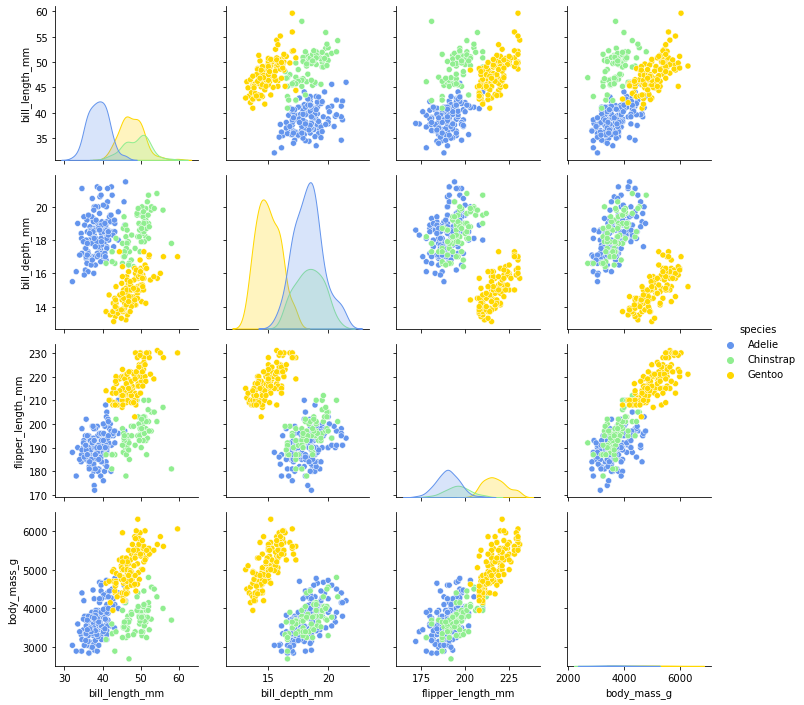

In [107]:
# Initializing a PairGrid object
g_grid = sns.PairGrid(penguins, hue = 'species')
# Plotting univariate plot on diagonal subplots
g_grid.map_diag(sns.kdeplot, fill = True)
# Plotting relational plot on the off-diagonal subplots
g_grid.map_offdiag(sns.scatterplot)
g_grid.add_legend();

# Task for you

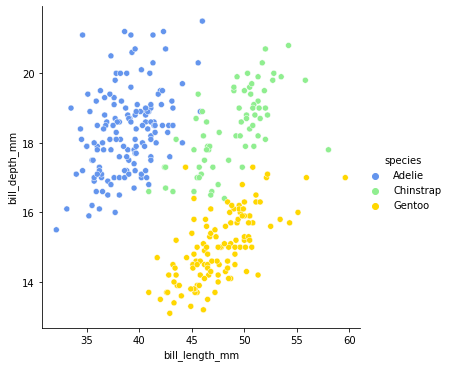

In [134]:
# TASK >>> How the bill length and bill depth relate to each other based on penguins species ? 
# One possible answer
sns.relplot(data = penguins, x = 'bill_length_mm', y = 'bill_depth_mm', hue = 'species');

Material adapted for RBI internal purposes with full permissions from original authors. Source: https://github.com/zatkopatrik/authentic-data-science